In [21]:
import pandas as pd
pd.set_option('max_colwidth', 100)
import seaborn as sns
sns.set()

In [22]:
raw = pd.read_csv('./reddit_questions.tsv', sep='\t')
raw.head(1)

,Unnamed: 0,op_id,op_gender,post_id,q,is_qy,q_score,oov
0,1441289,BendyZebra,W,1441289,"Its horrible being severe, isnt it?",False,2.091765e-07,False


In [38]:
def pronouns(x):
    keywords = [' he ', ' him ', ' she ', 'her', ' they ', ' them ', ' it ', 'is that', ' this ']
    return any(i in x.lower() for i in keywords)

def rhetoric(x):
    keywords = ['shouldn\'t', 'wouldn\'t', 'couldn\'t']
    return any(x.lower().startswith(i) for i in keywords)

def too_short(x):
    return len(x.split(' ')) <= 5

def startswith_keyword(x):
    keywords = ['do', 'does', 'did', 'are', 'is', 'was', 'should', 'who', 'what', 'where', 'when', 'how']
    return any(x.lower().startswith(i) for i in keywords)

def filter_q(x):    
    return not(pronouns(x) or too_short(x) or rhetoric(x)) and startswith_keyword(x)

raw['valid_q'] = raw.q.apply(filter_q)
# qy questions
df = raw[raw.valid_q].copy()
# all question
#df = raw[raw.valid_q].copy()

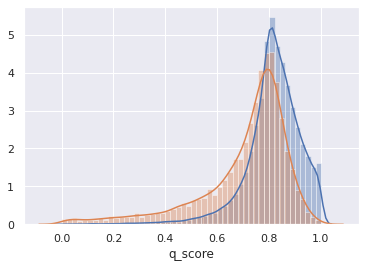

In [39]:
sns.distplot(df[df.op_gender == 'M'].q_score)
sns.distplot(df[df.op_gender == 'W'].q_score)

In [57]:
df.sort_values('q_score', inplace=True)
female = df[df.op_gender == 'W'].head(500)
male = df[df.op_gender == 'M'].tail(500)
df.sample(10)

,Unnamed: 0,op_id,op_gender,post_id,q,is_qy,q_score,oov,valid_q
77731,1024123,socialpresence,M,1024123,What motivation do these guys really have to do so?,False,0.737495,False,True
216912,1062956,operationDIE,M,1062956,"What if I told you that I would buy them, regardless of how much money I have, but I cant becaus...",False,0.835999,False,True
279148,606531,ThereIsAThingForThat,M,606531,What was the best part about Finland?,False,0.892805,False,True
83925,1207097,PurplePlurple,M,1207097,Who wouldnt be thrilled about you getting a new kitchen on the cheap!?,False,0.745756,False,True
151318,1005533,diaspora,M,1005533,How well is Polumbus playing for you guys?,False,0.800929,False,True
241602,1063467,ErisGrey,M,1063467,How well of a set-up do you think you can get with a Galaxy Note 2 and a EVGA GTX 770?,False,0.855164,False,True
174817,424790,830rezdorsia,W,424790,"Whos got their claws in you, my friend?",False,0.809806,False,True
193934,924050,crunchyturtles,W,924050,What exactly about the American civil war was an unjust uprising?,False,0.820876,False,True
231898,619358,ifornia,M,619358,When did Holmoe coach at Washington?,False,0.847249,False,True
103606,606043,moon_physics,M,606043,What are the stereotypes of different areas in Mexico?,False,0.766963,False,True


In [45]:
df_ = pd.concat([female, male])
df_['gpt'] = df_.q.apply(lambda x: x + '<|endoftext|>')
df_[['op_gender', 'gpt']].to_csv('qy_1000_MW.tsv', sep='\t', header=None, index=False)

In [46]:
!shuf ./qy_1000_MW.tsv | head

W	Are these people you had relationships with before?<|endoftext|>
M	Do you know what a Raspberry Pi costs?<|endoftext|>
M	Didnt play those games, but why is a few of those games doing that, indicative of all games doing that?<|endoftext|>
W	Do we think Tiff has a crush on Paulie?<|endoftext|>
M	Are you actually saying that the way to rate top receivers from a season is their yardage totals?<|endoftext|>
M	Did you not see that post about how all 32 teams feel like r/nba hates them?<|endoftext|>
M	Do you actually want the Democrat to win?<|endoftext|>
M	How should I go about this?<|endoftext|>
M	What the fuck did you just fucking say about me, you little bitch?<|endoftext|>
W	What do you think makes you ugly?<|endoftext|>
shuf: write error: Broken pipe
shuf: write error
